## Melbourne Housing Price-Prediction 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#read the dataset

mhp = pd.read_csv('melbourne_housing.csv')

In [3]:
#copy the data and assign a new name

df= mhp.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
# Remove the irrelavent columns

df.drop(columns=['Address','Date','YearBuilt','Postcode','Lattitude','Longtitude'],inplace=True)

In [7]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,1480000,S,Biggin,2.5,2,1,1.0,202,NaN,Yarra,Northern Metropolitan,4019
1,Abbotsford,2,h,1035000,S,Biggin,2.5,2,1,0.0,156,79.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,3,h,1465000,SP,Biggin,2.5,3,2,0.0,134,150.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,3,h,850000,PI,Biggin,2.5,3,2,1.0,94,NaN,Yarra,Northern Metropolitan,4019
4,Abbotsford,4,h,1600000,VB,Nelson,2.5,3,1,2.0,120,142.0,Yarra,Northern Metropolitan,4019


In [8]:
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
CouncilArea      1369
Regionname          0
Propertycount       0
dtype: int64

In [9]:
# for nan values fill with zero '0'

df['Car'].fillna(0, inplace=True)

In [10]:
# imputing  nan to mean 

df['BuildingArea'].fillna(df['BuildingArea'].mean(),inplace=True)

In [11]:
# imputing nan values to mode

df['CouncilArea'].fillna('Moreland',inplace=True)

In [12]:
df['CouncilArea'].mode()

0    Moreland
Name: CouncilArea, dtype: object

In [13]:
# No nan values

df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_5608\1847276946.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

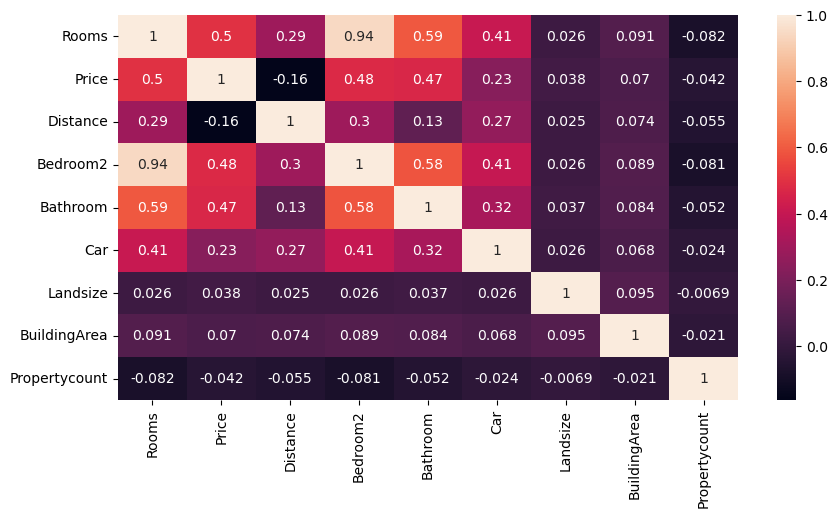

In [14]:
# check the co-relationb/w the variables

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [15]:
# converting the categorical data into numerical data using pandas dummies

df1 = pd.get_dummies(df,drop_first=True)
df1

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000,2.5,2,1,1.0,202,151.96765,4019,0,...,0,1,0,0,1,0,0,0,0,0
1,2,1035000,2.5,2,1,0.0,156,79.00000,4019,0,...,0,1,0,0,1,0,0,0,0,0
2,3,1465000,2.5,3,2,0.0,134,150.00000,4019,0,...,0,1,0,0,1,0,0,0,0,0
3,3,850000,2.5,3,2,1.0,94,151.96765,4019,0,...,0,1,0,0,1,0,0,0,0,0
4,4,1600000,2.5,3,1,2.0,120,142.00000,4019,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000,16.7,4,2,2.0,652,151.96765,7392,0,...,0,0,0,0,0,0,1,0,0,0
13576,3,1031000,6.8,3,2,2.0,333,133.00000,6380,0,...,0,0,0,0,0,0,0,0,1,0
13577,3,1170000,6.8,3,2,4.0,436,151.96765,6380,0,...,0,0,0,0,0,0,0,0,1,0
13578,4,2500000,6.8,4,1,5.0,866,157.00000,6380,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# take independed varibles as features

features = df1.drop(columns='Price')

In [17]:
# dependent variables as target

target = df1[['Price']]

In [18]:
# Spliting the data into train and test for cross-validation

x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.7,random_state=100)

In [19]:
# importing the linear regression algorithem

from sklearn.linear_model import LinearRegression

In [20]:
# assign a name to the linear regression

leg = LinearRegression()

In [21]:
# fit the model

leg.fit(x_train,y_train)

LinearRegression()

In [22]:
# the tesing model score is very poor because of overfitting 

leg.score(x_test,y_test)

-11114274922.3623

In [23]:
# Training model score is good

leg.score(x_train,y_train)

0.7145205428520306

In [24]:
# Based on the result i conclude that  model is overfit

## L1 Regularization (Lasso)

In [25]:
# Apply a L1 regularization (Lasso) and privent the overfit

from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.952e+14, tolerance: 3.913e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [26]:
# The L1 regularization is give a better score in testing 

lasso_reg_pred =lasso_reg.score(x_test,y_test)
lasso_reg_pred

0.6595058913393796

In [27]:
lasso_reg.score(x_train,y_train)

0.7083174510348698

In [28]:
# the L1 regularization is give a better score on both trainning & testing   

## L1 Regularization (Ridge)

In [29]:
#  Apply a L2 regularization (Ridge) and privent the overfit

from sklearn.linear_model import Ridge, ElasticNet
ridge_reg = Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [30]:
ridge_reg_pred = ridge_reg.score(x_test,y_test)
ridge_reg_pred

0.648712433443462

In [31]:
ridge_reg.score(x_train,y_train)

0.6759257794684435

In [32]:
# the L2 regularization is give a better score on both trainning & testing   

## ElasticNet

In [33]:
elsnet_reg = ElasticNet(alpha=0.5,max_iter=100,tol=0.1)

In [34]:
elsnet_reg.fit(x_train,y_train)

ElasticNet(alpha=0.5, max_iter=100, tol=0.1)

In [35]:
elsnet_reg_pred = elsnet_reg.score(x_test,y_test)
elsnet_reg_pred

0.5167247138586175

In [36]:
elsnet_reg.score(x_train,y_train)

0.5389267076131304

In [37]:
Results = pd.DataFrame({'Model': ['Lasso','Ridge','ElasticNet'],'Model score':[lasso_reg_pred,ridge_reg_pred,elsnet_reg_pred]})

In [38]:
Results

,Model,Model score
0,Lasso,0.659506
1,Ridge,0.648712
2,ElasticNet,0.516725


### Based on the results Lasso is give a good accuracy